### Ответы в листьях регрессионного дерева

Сделаем как на семинаре.
$X_i$ - объекты в листе
$y_i$ - метки
$\hat{y}$ - полученный результат

Матожижание ошибки считается по формуле:

$E\Sigma_{i=1}^n(y_i - \hat{y})^2 = \Sigma_{i=1}^n E y_i^2 - 2 n E y_i \hat{y} + \Sigma_{i=1}^n E \hat{y}^2 = n $

Посчитаем 3-е слагаемое для равновероятного выбора.

$\Sigma_{i=1}^n E \hat{y}^2 = n (\frac{1}{n} \Sigma_{i = 1}^{n} y_i)^2$ 

А в случае равномерного дискретного распределения получаем:

$\Sigma_{i=1}^n E \hat{y}^2 = n (\frac{1}{n} \Sigma_{i = 1}^{n} y_i^2)$

Ясно, что $E(\xi^2) \geqslant (E \xi)^2$, то есть выгоднее брать средний таргет

### Unsupervised decision tree

По формуле энтропии:

$H(S) = - \int \cdots \int_{\mathbb{R}^n} f(x) \cdot \ln f(x) dx$ 
Подставим плотность многомерного нормального распределения $f(x) = \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-1/2\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x-\mu)}$. Тогда 
$ \int \cdots \int_{\mathbb{R}^n} f(x) (\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x-\mu)+\ln((2\pi)^{n/2}|\Sigma|^{1/2})) dx = \frac{1}{2}E(\Sigma_{i, j} (x_i - \mu_i)(\Sigma^{-1})_{ij}(x_j - \mu_j)) + \frac{1}{2} \ln((2\pi)^n |\Sigma|)$ Вносим матожидание под знак суммы, замечаем, что произведение

$E((x_i-\mu_i)(x_j-\mu_j)) = \Sigma_{ij}$
$\frac{1}{2}\Sigma_i (\Sigma\Sigma^{-1}) + \frac{1}{2} \ln((2\pi)^n |\Sigma| =$ $= \frac{1}{2} \Sigma_i (E)_{i,j} + \frac{1}{2} \ln((2\pi)^n |\Sigma| = \frac{n}{2} + \frac{1}{2} \ln((2\pi)^n |\Sigma| = \frac{1}{2} \ln((2\pi e)^n |\Sigma|$ QED

### 2

In [1]:
import pydotplus 
import pandas as pd

from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

/usr/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_table('german.data-numeric', sep='\\s+', header=None)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [14]:
columns = [i for i in range(25)]
X = data[columns[:-1]]
y = np.array([1 if i == 1 else 0 for i in np.array(data[columns[-1]])])

model = tree.DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [15]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                         feature_names=columns,  
                         class_names=["0", "1"],  
                         filled=True, rounded=True,  
                         special_characters=True)

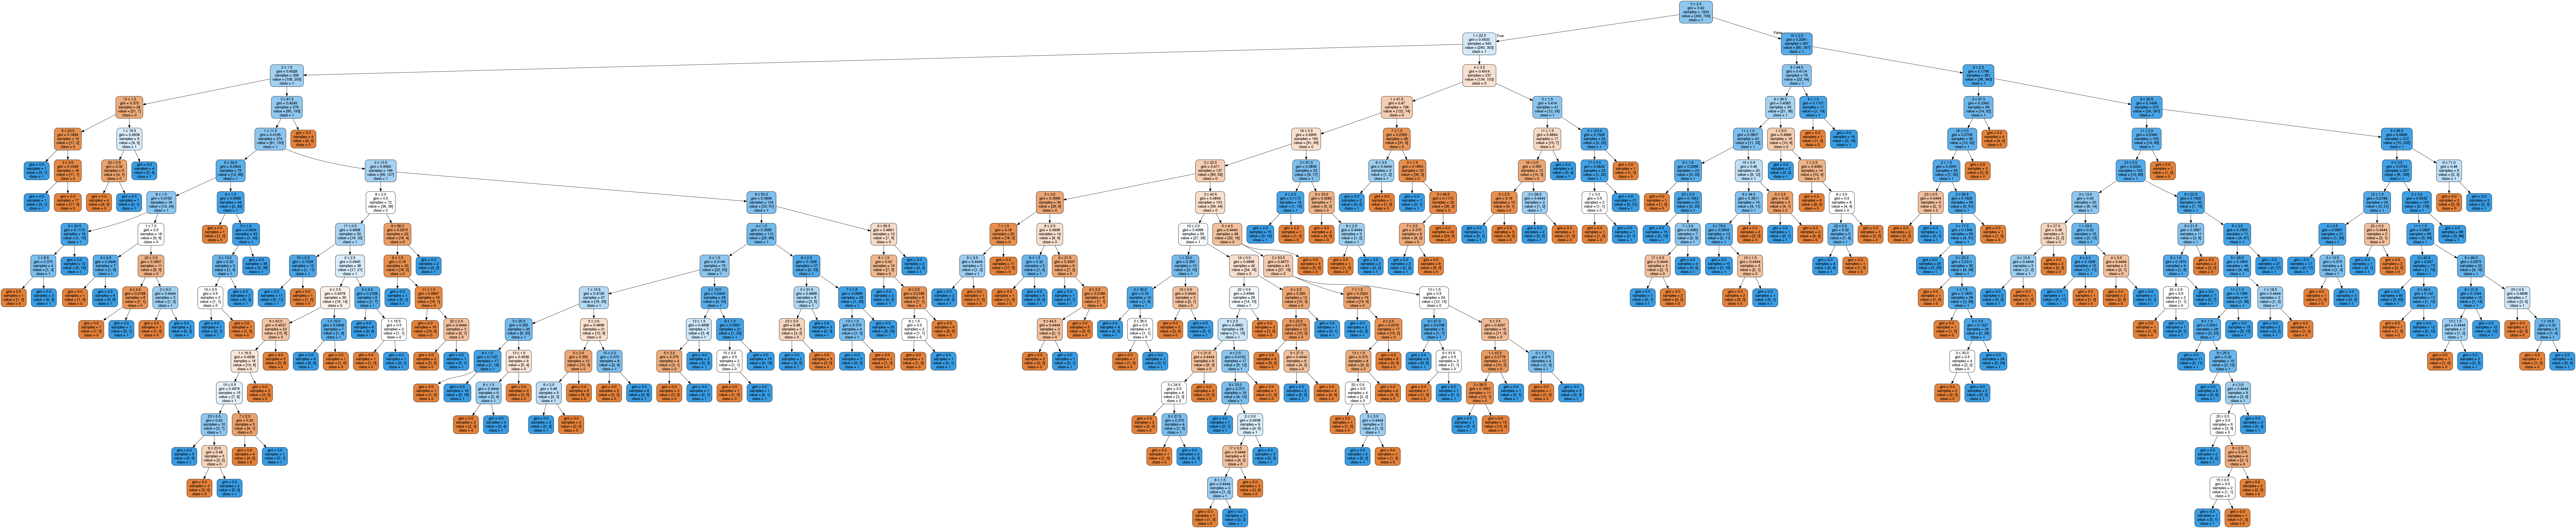

In [16]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())

Сделаем глубину меньше

In [18]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [19]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                         feature_names=columns,  
                         class_names=["0", "1"],  
                         filled=True, rounded=True,  
                         special_characters=True)

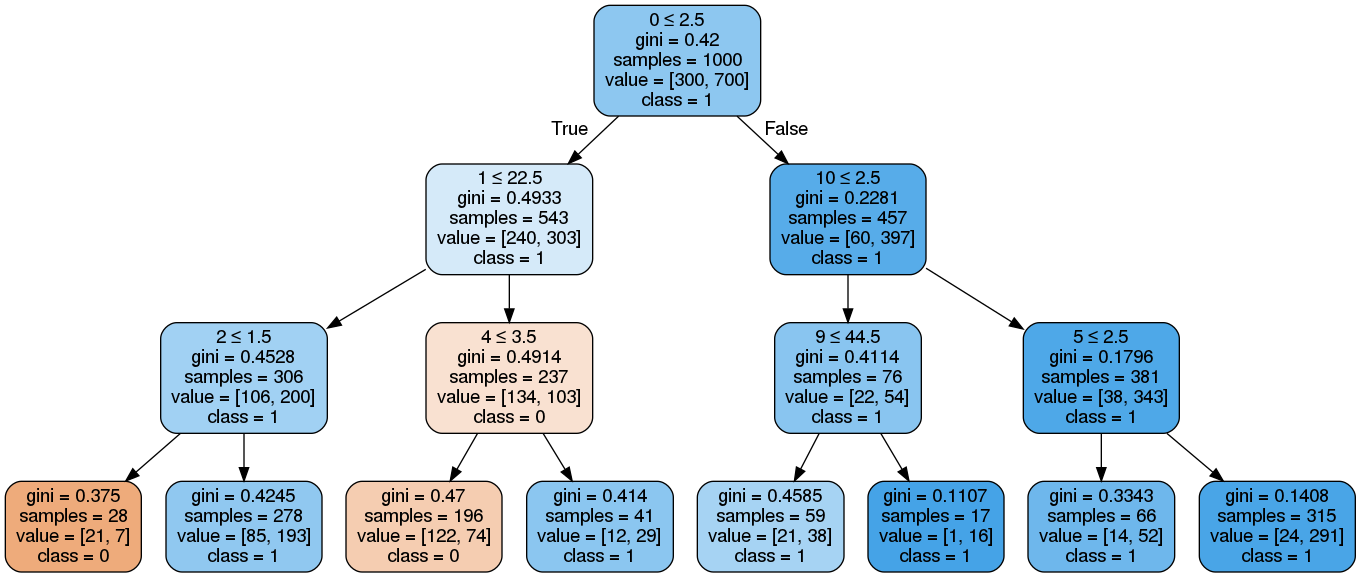

In [20]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())

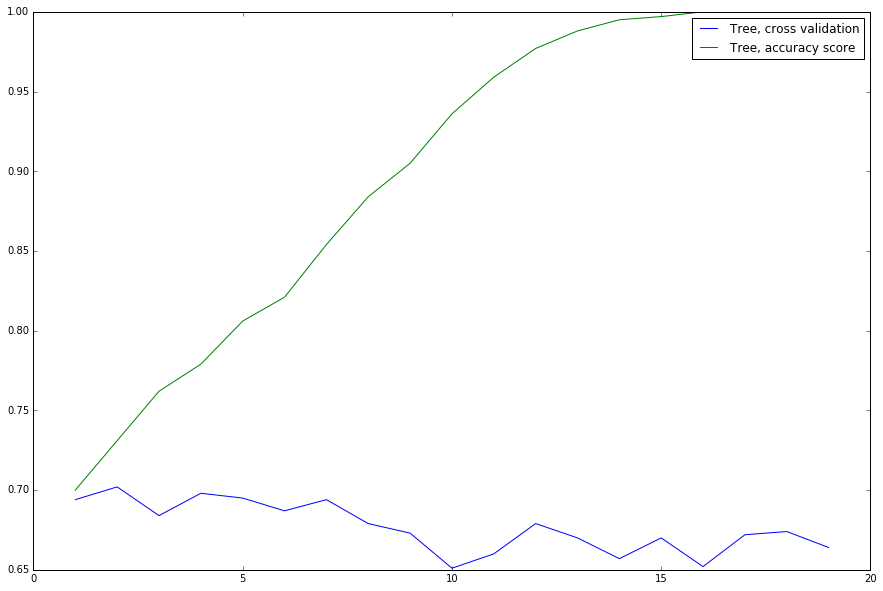

In [25]:
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline


cross_val = [cross_val_score(tree.DecisionTreeClassifier(max_depth=d, max_features=int(X.shape[1] ** 0.5)), 
                      X, y, cv=5).mean() for d in range(1, 20)]

scores = [accuracy_score(tree.DecisionTreeClassifier(max_depth=d).fit(X, y).predict(X), y) for d in range(1, 20)]

plt.figure(figsize=(15, 10))
plt.plot(range(1, 20), cross_val, label='Tree, cross validation')
plt.plot(range(1, 20), scores, label='Tree, accuracy score')
plt.legend()
plt.show()